# 3. Machine Learning for Classification

We'll use logistic regression to predict churn


## 3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
* Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
* Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df['ocean_proximity'] = df['ocean_proximity'].apply(lambda x: x.replace(' ', '_'))

In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df = df.fillna(0)

In [6]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [8]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [9]:
df['population_per_household'] = df['population'] / df['households']

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR_BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR_BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR_BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR_BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR_BAY,6.281853,0.172096,2.181467


### Question 1

In [11]:
df.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H_OCEAN
freq,9136


In [12]:
print(" Most frequent value for ocean_proximity: <1H OCEAN")

 Most frequent value for ocean_proximity: <1H OCEAN


## Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (median_house_value) is not in your dataframe.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train, y_val, y_test = df_train['median_house_value'].values, df_val['median_house_value'].values, df_test['median_house_value'].values

In [17]:
X_train, X_val, X_test = df_train.drop('median_house_value', axis=1), \
                            df_val.drop('median_house_value', axis=1), \
                            df_test.drop('median_house_value', axis=1)

In [18]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [19]:
len(X_train), len(X_val), len(X_test)

(12384, 4128, 4128)

### Question 2

In [20]:
num = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 
       'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

In [21]:
X_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925005,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
latitude,-0.925005,1.000000,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
housing_median_age,-0.099812,0.002477,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,0.036449,-0.025914,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,0.063840,-0.059730,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,0.091670,-0.100272,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,0.049762,-0.063529,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.085832,0.058004,-0.032522
median_income,-0.016426,-0.076805,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.394154,-0.616617,-0.000454
rooms_per_household,-0.034814,0.119118,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,1.000000,-0.500589,0.001801
bedrooms_per_room,0.102320,-0.124507,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.500589,1.000000,-0.002851


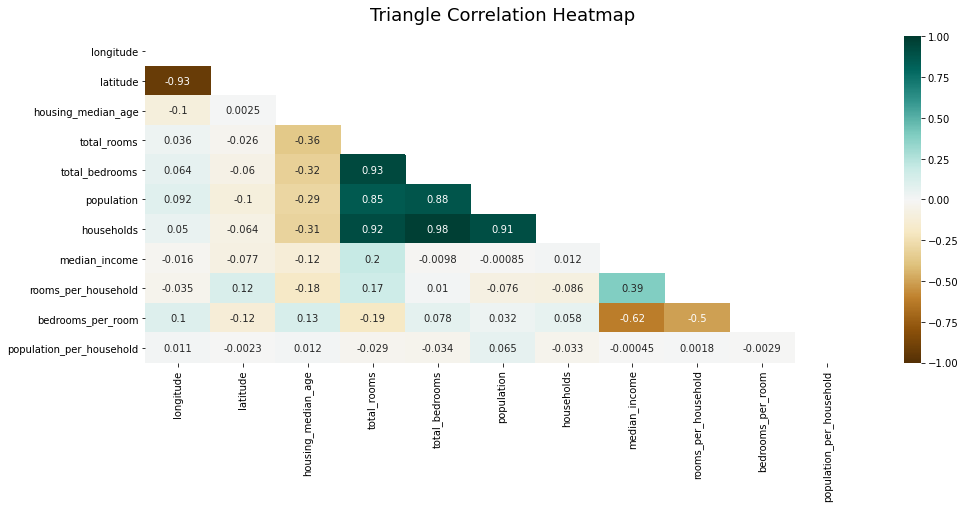

In [22]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(X_train[num].corr(), dtype=np.bool))

heatmap = sns.heatmap(X_train[num].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [23]:
print("Features with biggest correlation: total_bedrooms and households (0.98)")

Features with biggest correlation: total_bedrooms and households (0.98)


## Make median_house_value binary
* We need to turn the median_house_value variable from numeric into binary.
* Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [24]:
t_mean = y_train.mean()

above_average_train = np.array([1 if i - t_mean > 0 else 0 for i in y_train])
above_average_val = np.array([1 if i - t_mean > 0 else 0 for i in y_val])
above_average_test = np.array([1 if i - t_mean > 0 else 0 for i in y_test])

In [25]:
y_train.mean()

206807.7419250646

In [26]:
y_train[:5]

array([241400., 500001.,  64100., 277200., 417000.])

In [27]:
above_average_train[:5]

array([1, 1, 0, 1, 1])

### Question 3

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
print ("Value of mutual information %.2f" % mutual_info_score(above_average_train, X_train['ocean_proximity']))

Value of mutual information 0.10


### Question 4
* Now let's train a logistic regression
* Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
* To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
* model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [31]:
dv = DictVectorizer(separator='_', sparse=False)

train_dict = X_train[['ocean_proximity']].to_dict(orient='records')
X_train_o = dv.fit_transform(train_dict)

val_dict = X_val[['ocean_proximity']].to_dict(orient='records')
X_val_o = dv.transform(val_dict)

test_dict = X_test[['ocean_proximity']].to_dict(orient='records')
X_test_o = dv.transform(test_dict)

In [32]:
X_train = X_train[num].merge(pd.DataFrame(X_train_o, columns=dv.feature_names_), left_index=True, right_index=True)
X_val = X_val[num].merge(pd.DataFrame(X_val_o, columns=dv.feature_names_), left_index=True, right_index=True)
X_test = X_test[num].merge(pd.DataFrame(X_test_o, columns=dv.feature_names_), left_index=True, right_index=True)

In [34]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, above_average_train)
score_all = accuracy_score(above_average_val, model.predict(X_val))

print('accuracy on the validation dataset %.2f' % score_all)

accuracy on the validation dataset 0.84


### Question 5
* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [35]:
score_d = {}

for i in X_train.columns:
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

    model.fit(X_train.drop(i, axis=1), above_average_train)
    score = accuracy_score(above_average_val, model.predict(X_val.drop(i, axis=1)))
    
    score_d[i] = score_all - score
    
print(score_d)

{'longitude': 0.004844961240310086, 'latitude': 0.0021802325581395943, 'housing_median_age': 0.0043604651162790775, 'total_rooms': -0.0009689922480620172, 'total_bedrooms': -0.0004844961240310086, 'population': 0.009447674418604723, 'households': 0.0029069767441860517, 'median_income': 0.05111434108527135, 'rooms_per_household': 0.0004844961240310086, 'bedrooms_per_room': 0.00024224806201555982, 'population_per_household': -0.0007267441860464574, 'ocean_proximity_<1H_OCEAN': -0.001211240310077466, 'ocean_proximity_INLAND': -0.0014534883720930258, 'ocean_proximity_ISLAND': 0.0, 'ocean_proximity_NEAR_BAY': -0.0004844961240310086, 'ocean_proximity_NEAR_OCEAN': 0.0021802325581395943}


In [37]:
score_d.items()

dict_items([('longitude', 0.004844961240310086), ('latitude', 0.0021802325581395943), ('housing_median_age', 0.0043604651162790775), ('total_rooms', -0.0009689922480620172), ('total_bedrooms', -0.0004844961240310086), ('population', 0.009447674418604723), ('households', 0.0029069767441860517), ('median_income', 0.05111434108527135), ('rooms_per_household', 0.0004844961240310086), ('bedrooms_per_room', 0.00024224806201555982), ('population_per_household', -0.0007267441860464574), ('ocean_proximity_<1H_OCEAN', -0.001211240310077466), ('ocean_proximity_INLAND', -0.0014534883720930258), ('ocean_proximity_ISLAND', 0.0), ('ocean_proximity_NEAR_BAY', -0.0004844961240310086), ('ocean_proximity_NEAR_OCEAN', 0.0021802325581395943)])

In [38]:
sorted(score_d.items(), key=lambda x: abs(x[1]))

[('ocean_proximity_ISLAND', 0.0),
 ('bedrooms_per_room', 0.00024224806201555982),
 ('total_bedrooms', -0.0004844961240310086),
 ('rooms_per_household', 0.0004844961240310086),
 ('ocean_proximity_NEAR_BAY', -0.0004844961240310086),
 ('population_per_household', -0.0007267441860464574),
 ('total_rooms', -0.0009689922480620172),
 ('ocean_proximity_<1H_OCEAN', -0.001211240310077466),
 ('ocean_proximity_INLAND', -0.0014534883720930258),
 ('latitude', 0.0021802325581395943),
 ('ocean_proximity_NEAR_OCEAN', 0.0021802325581395943),
 ('households', 0.0029069767441860517),
 ('housing_median_age', 0.0043604651162790775),
 ('longitude', 0.004844961240310086),
 ('population', 0.009447674418604723),
 ('median_income', 0.05111434108527135)]

In [40]:
print("Out of total_rooms, total_bedrooms, population, households\ntotal_bedrooms has the smalles differense in accuracy")

Out of total_rooms, total_bedrooms, population, households
total_bedrooms has the smalles differense in accuracy


### Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [41]:
from sklearn.linear_model import Ridge

In [42]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [43]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    print(f'alpha=%s \t %.3f' % (a, rmse(y_val, model.predict(X_val))))

alpha=0 	 0.524
alpha=0.01 	 0.524
alpha=0.1 	 0.524
alpha=1 	 0.524
alpha=10 	 0.524
